# Lab 7 Supernova Light Curve

## Patrick Selep

## Abstract

Various supernova observations were analyzed and a light curve created using aperature and differential photometry. A sequence of successive observations was selected and the associated light curve was correlated with a template. Through the Phillips Relationship for Type 1a supernova the absolute magnitude was calculated. By comparing this value to the apparent magnitude the distance was calculated. Given the redshift for the associated galaxy and the calculated distance, the Hubble constant estimated. This value was in the same order of magnitude as the current accepted value. 

## SN 2019tym

A number of supernova were observed over a period of nights in a variety of filters from the Mount Laguna Observatory of San Diego State University.  SN 2019tym was selected given the number of usable observations made. AstroImageJ was used to reduce the data, perform the photometry, produce the light curve and create the measurements table.

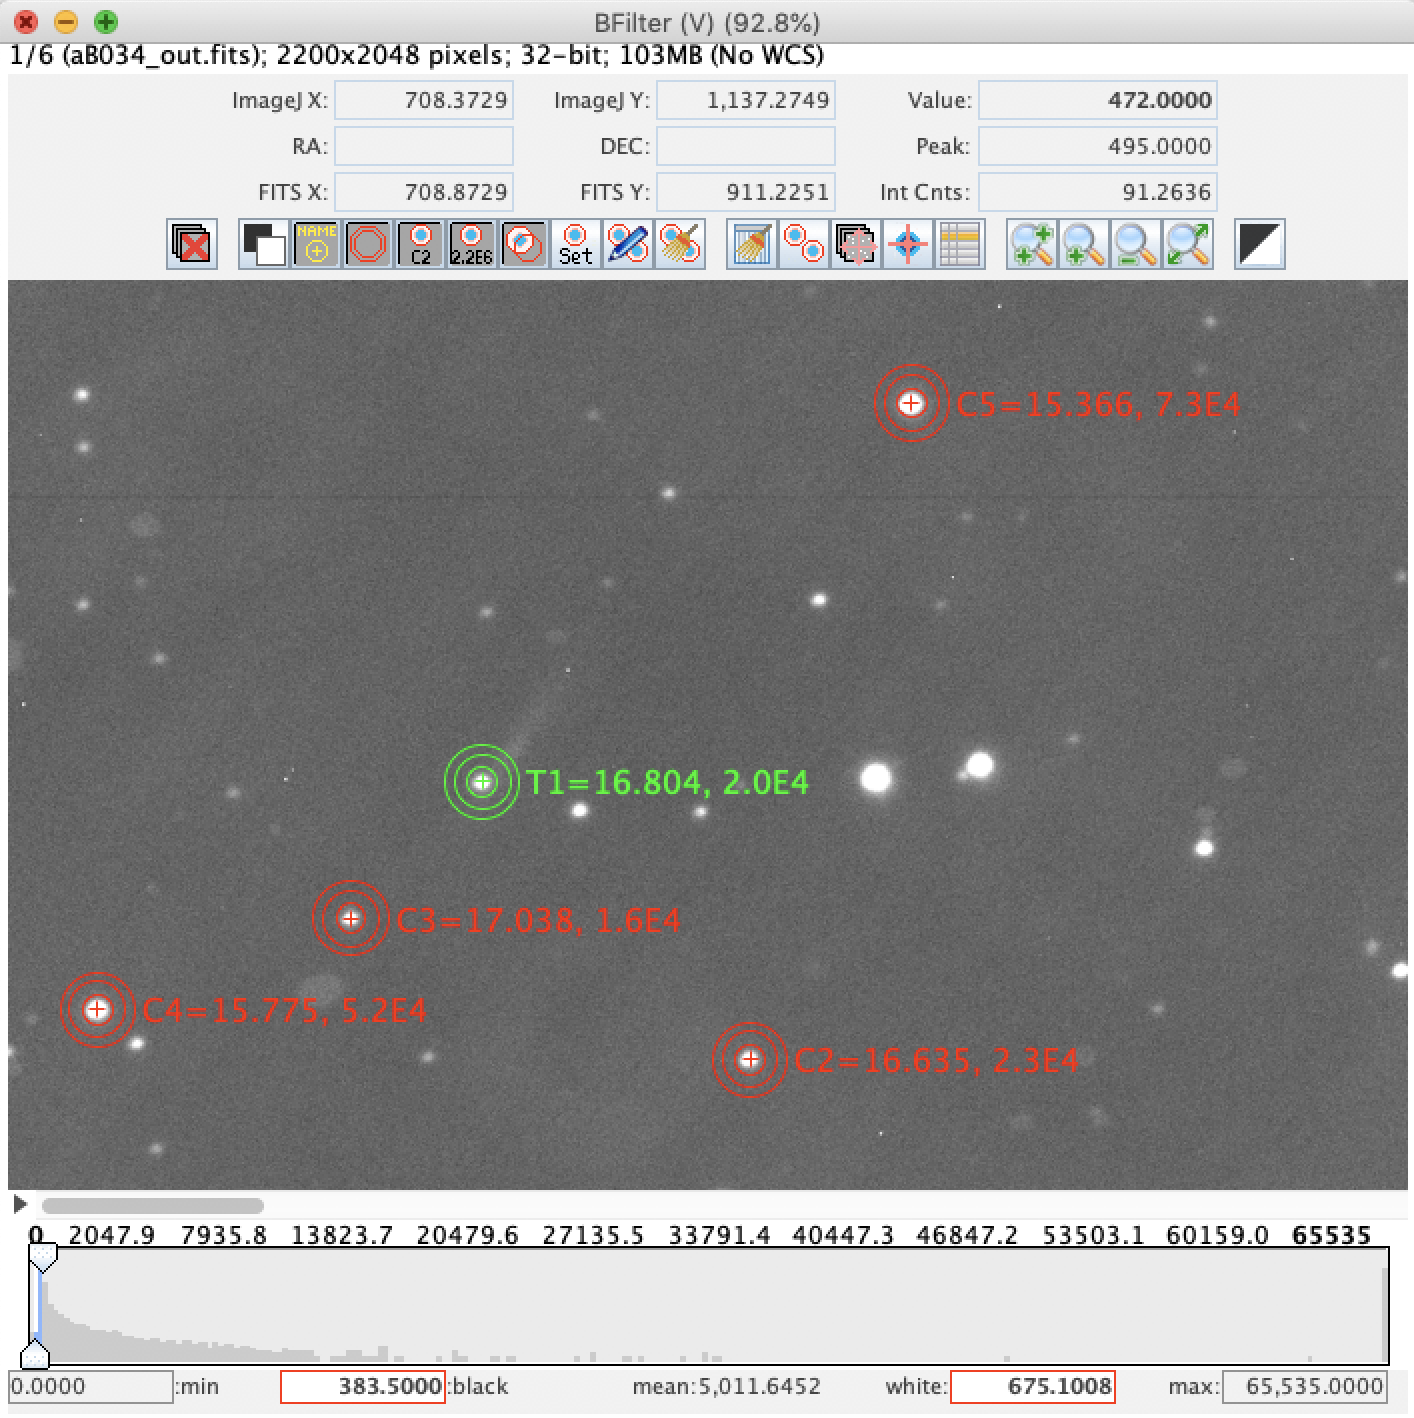

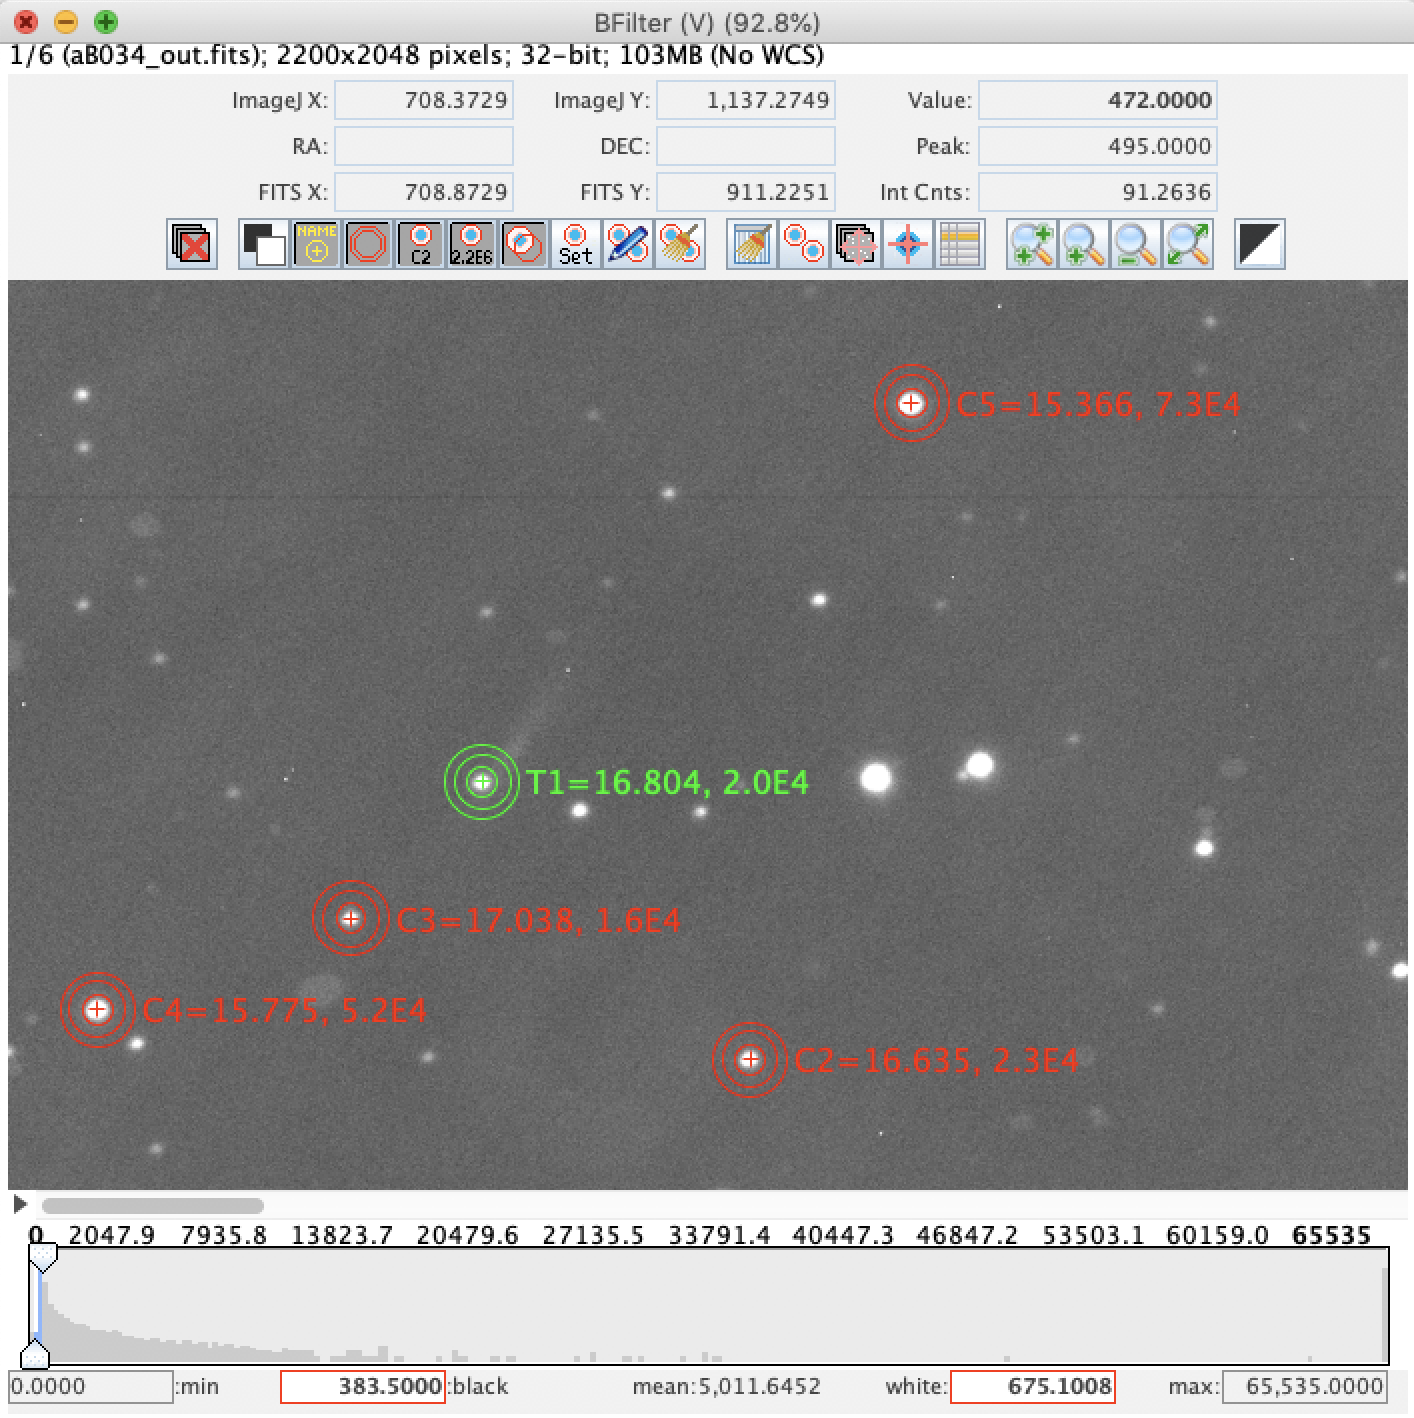

In [1]:
from IPython.display import Image
Image(filename='Screen Shot 2020-04-14 at 3.22.04 PM.png')

Type 1a supernove have a characteristic light curve with a rapid rise up to a peak and a slower fall back down over time.  This makes them suitable for use as a standardizable candle. Their light curves can be fit to a template and based on certain relationships in the data the absolute magnitude of the supernova determined.

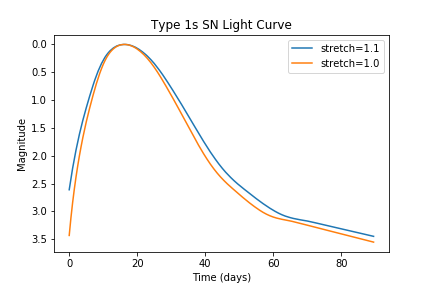

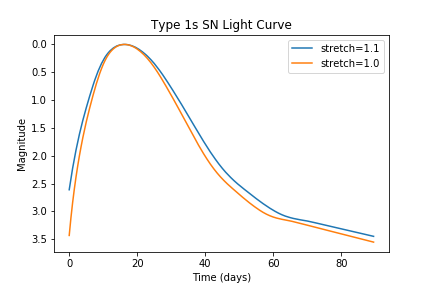

In [2]:
from IPython.display import Image
Image(filename='Type1aSNLightKurve.png')

A light curve was constructed from observations taken over several nights, generally three minute exposures using 1x1 binning with a B, V or R filter. The observations were made throughout November and early December with SDSU's MLO 40" telescope and CCD camera.

AstroImageJ (AIJ) was used extensively to calibrate the images with bias and flat field images.
AIJ's Multi-Aperature functionality was used to select stars to analyze and compare. (Collins, 2017)

The output file was then read into Phython and the data plotted in a light curve. Data on both sides of the peak was captured so the curve could be fit to the template.

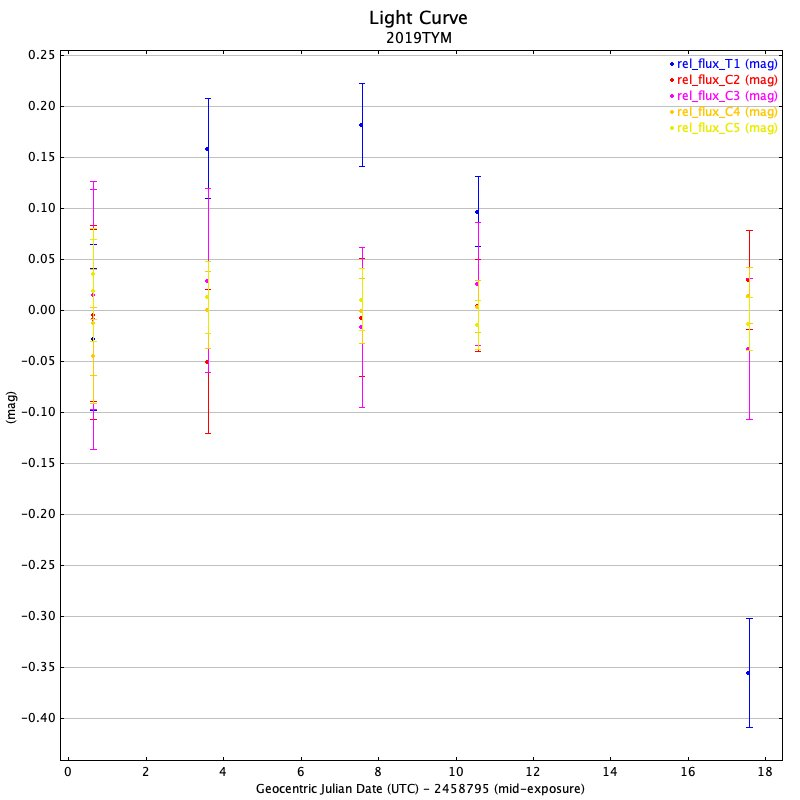

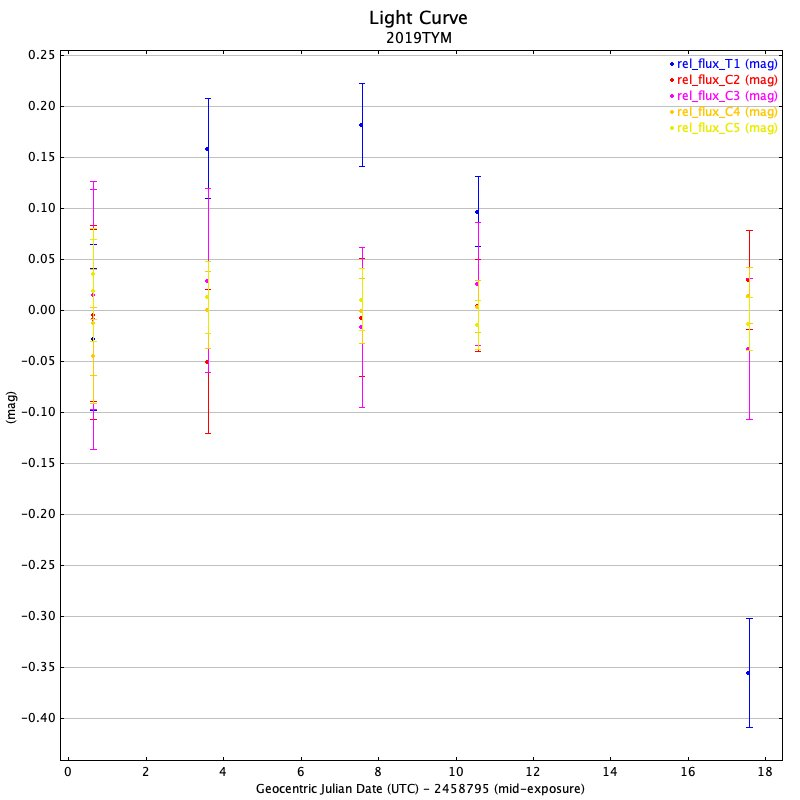

In [3]:
from IPython.display import Image
Image(filename='Plot of Measurements.jpg')

The curve was fit to the template adjusting the peak magnitude, time and stretch factor. The peak apparent magnitude was found to be near 16.21 and the stretch factor near 1.1. 



## Light Curve

In [49]:
from astropy.io import fits
from os import walk
from matplotlib import pyplot as plt

import numpy as np
from scipy import stats


Data shows 6 observations in this lightcurve.


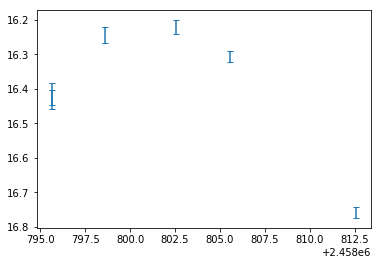

In [102]:
data = np.genfromtxt(fname="6SNMeasurements2019TYM.tsv", delimiter="\t", skip_header=1, filling_values=1)  # change filling_values as req'd to fill in missing values
print("Data shows",data.shape[0],"observations in this lightcurve.")
#print(data)
#print(data[:,5],data[:,27],data[:,20])
#print("The minimum magnitude was %0.4f" % max(data[:50,21]),"and the maximum was %0.4f" % min(data[:50,21]))
#print("The mean magnitude was %0.4f" % np.mean(data[:50,21]),"and the median was %0.4f" % np.median(data[:50,21]))
plt.errorbar(data[:,5],data[:,27],yerr=2.5*(data[:,20]),ls='',capsize = 3)
#plt.plot((lata[2:,0]*Stretch+Offset),(lata[2:,2]*Scale))
plt.gca().invert_yaxis()
plt.show()

In [110]:
# Kaplan's Kurve fitting

from make_SNfunction import *
LC = SNlightcurve()

#print(LC.band)
#print(LC.data)
#print(LC.t)
#print(LC.mag)

#print(LC.mag_interp(-10))
    
#print(data[:,5],data[:,27],data[:,20])

t = data[:,5]-2458801.1743
m = data[:,27]
m_err = (data[:,20])
#m_err = .006
m0_guess = 16.21
t0_guess = 0
s_guess = 1.1
popt, pcov = scipy.optimize.curve_fit(LC.compute_lightcurve, t, m, sigma=m_err, p0 = [m0_guess, t0_guess, s_guess], absolute_sigma = True)
perr = np.sqrt(np.diag(pcov))
print ("Peak Mag = %0.10f (+/-) %0.10f" % (popt[0], perr[0]))
print ("Offset = %0.4f (+/-) %0.4f" %(popt[1], perr[1]))
print ("Stretch = %0.4f (+/-) %0.4f" %(popt[2], perr[2]))


'''
plt.errorbar(data[:,5],data[:,27],yerr=2.5*(data[:,20]),linestyle='',capsize = 3)
plt.plot(2458801.1743+lata[2:,0],16.2110945947+lata[2:,2],label="JD = 2458801.1743")
plt.plot((2458801.1743+lata[2:,0]*Stretch+Offset),16.2110945947+(lata[2:,2]*Scale),label="Stretch =1.1097")
plt.plot(2458801.1743+LC.t,16.2110945947+LC.mag,label="Peak = 16.2110945947")
plt.axvline((2458801.1743))
plt.axvline((2458816.1743))
plt.hlines(16.2110945947,xmin=2458801.25,xmax=2458811.25,label='16.2110945947')
plt.gca().invert_yaxis()
plt.title("SN 2019tym Light Curve")
plt.xlabel("JD_UTC")
plt.ylabel("Magnitude")
plt.legend()
plt.savefig("SN2019tymKurve.png")
plt.show()    
    
t = np.arange(-10,80,0.5) + 10
    
plt.clf()
plt.plot(t,LC.compute_lightcurve(t, 0, 16.21, 1.1),label='stretch=1.1')
plt.plot(t,LC.compute_lightcurve(t, 0, 16.21, 1.0),label='stretch=1.0')
#plt.plot(t,LC.compute_lightcurve(t, 0, 16.21, 1.1097),label='stretch=1.1097')
#plt.plot(10, 15, 'ro',label='max light')
plt.gca().invert_yaxis()
plt.legend()
plt.title("Type 1s SN Light Curve")
plt.xlabel('Time (days)')
plt.ylabel('Magnitude')
plt.savefig("Type1aSNLightKurve.png")
plt.show()    

'''

chisq = (((LC.compute_lightcurve(t, popt[0], popt[1], popt[2]) - m)/m_err)**2).sum()
dof = len(m) - 3    

#print(len(m))
print("Chi Squared = %0.4f" %chisq)
print("Reduced Chi Squared = %0.4f" %(chisq/dof))

    


Peak Mag = 16.2110945947 (+/-) 0.0047409741
Offset = 0.0000 (+/-) 0.0725
Stretch = 1.1097 (+/-) 0.0115
Chi Squared = 2.0229
Reduced Chi Squared = 0.6743


## Phillips Relationship

$\text{Absolute Magnitude, } M_{max}(B) \text{, was calculated as follow:}$

$${M_{max}(B)} = {-21.726 + {2.698\Delta {m_{15}(B)}}}$$

$\text{where } m_{15}(B) \text{ is the difference between the peak magnitude and the magnitude at 15 days after the peak.}$

$\text{Phillips, M. M. (1993). "The absolute magnitudes of Type IA supernovae". Astrophysical Journal Letters. 413 (2): L105–L108. Bibcode:1993ApJ...413L.105P. doi:10.1086/186970.}$

## Distance

$\text{} Distance \text{, was calculated as follow:}$

$${Distance} = {10^ {( {Apparent Magnitude} - {Absolute Magnitude} + 5 ) / 5}}$$



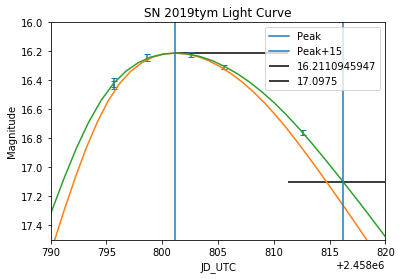

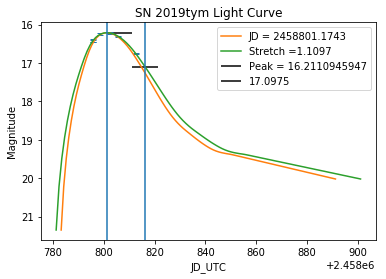

The absolute magnitude = -19.33 (+/-) 0.0127911483
The distance = 128.56 Mpc (+/-) 1.0298907280
Hubble Constant 46.637280674014995 km / (Mpc s)



v =  5995.849160000001 km / s  based on redshift of z = 0.02
C =  299792.458 km / s , and using Ho of  70.0 km / (Mpc s)
Distance by redshift (c*z)/Ho in Mpc 85.654988 Mpc


In [118]:
lata = np.genfromtxt(fname="SNIa_lc_template.dat", delimiter="\t", skip_header=1, filling_values=1)  # change filling_values as req'd to fill in missing values
#print("Data shows",lata.shape,"observations in this lightcurve.")
#print(lata)
#print("The minimum magnitude was %0.4f" % max(lata[:,21]),"and the maximum was %0.4f" % min(data[:,21]))
#print("The mean magnitude was %0.4f" % np.mean(lata[:,21]),"and the median was %0.4f" % np.median(lata[:,21]))
#print(lata[2:,0])
Offset = 0
Stretch = 1.1097
Scale = 1

'''
plt.errorbar(data[:,5],data[:,27],yerr=2.5*data[:,20],linestyle='',capsize = 3)
plt.plot(2458801.1743+lata[2:,0],16.2110945947+lata[2:,2])
plt.plot((2458801.1743+lata[2:,0]*Stretch+Offset),16.2110945947+(lata[2:,2]*Scale))
#plt.xlim(2458816,2458817)
plt.xlim(2458814,2458818)
#plt.ylim(17.25,17.30)
plt.ylim(17.05,17.30)
plt.axvline(2458801.1743,label='Peak')
plt.hlines(16.2110945947,xmin=2458801.25,xmax=2458811.25,label='16.2110945947')
plt.hlines(16.2110945947+0.8864,xmin=2458811.25,xmax=2458821.25,label='17.0975')
#plt.hlines(16.2110945947+1.0479,xmin=2458811.25,xmax=2458821.25,label='17.259')
plt.axvline(2458816.187,label='Peak+15')
plt.gca().invert_yaxis()
plt.title("SN 2019tym Light Curve")
plt.xlabel("JD_UTC")
plt.ylabel("Magnitude")
plt.legend()
plt.savefig("SN2019tymPeak.png")
plt.show()
'''

plt.errorbar(data[:,5],data[:,27],yerr=2.5*data[:,20],linestyle='',capsize = 3)
plt.plot(2458801.1743+lata[2:,0],16.2110945947+lata[2:,2])
plt.plot((2458801.1743+lata[2:,0]*Stretch+Offset),16.2110945947+(lata[2:,2]*Scale))
plt.xlim(2458790,2458820)
plt.ylim(16,17.5)
plt.axvline(2458801.1743,label='Peak')
plt.hlines(16.2110945947,xmin=2458801.25,xmax=2458811.25,label='16.2110945947')
plt.hlines(16.2110945947+0.8864,xmin=2458811.25,xmax=2458821.25,label='17.0975')
#plt.hlines(16.2110945947+1.0479,xmin=2458811.25,xmax=2458821.25,label='17.259')
plt.axvline(2458816.1743,label='Peak+15')
plt.gca().invert_yaxis()
plt.title("SN 2019tym Light Curve")
plt.xlabel("JD_UTC")
plt.ylabel("Magnitude")
plt.legend()
plt.savefig("SN2019tymPlus15.png")
plt.show()

plt.errorbar(data[:,5],data[:,27],yerr=2.5*(data[:,20]),linestyle='',capsize = 3)
plt.plot(2458801.1743+lata[2:,0],16.2110945947+lata[2:,2],label="JD = 2458801.1743")
plt.plot((2458801.1743+lata[2:,0]*Stretch+Offset),16.2110945947+(lata[2:,2]*Scale),label="Stretch =1.1097")
plt.axvline((2458801.1743))
plt.axvline((2458816.1743))
plt.hlines(16.2110945947,xmin=2458801.25,xmax=2458811.25,label='Peak = 16.2110945947')
plt.hlines(16.2110945947+0.8864,xmin=2458811.25,xmax=2458821.25,label='17.0975')
plt.gca().invert_yaxis()
plt.title("SN 2019tym Light Curve")
plt.xlabel("JD_UTC")
plt.ylabel("Magnitude")
plt.legend()
plt.savefig("SN2019tymCurve.png")
plt.show()

#From http://hosting.astro.cornell.edu/academics/courses/astro201/mag_absolute.htm
#From https://en.wikipedia.org/wiki/Phillips_relationship#/media/File:Dm15_definition_3.gif
Peak_Abs_Mag = -21.726 + 2.698 * 0.8864

print("The absolute magnitude = %0.2f (+/-) %0.10f" % (Peak_Abs_Mag, 2.698 * perr[0]))

Dist = (10**((16.2110945947-Peak_Abs_Mag+5)/5))/10**6

print("The distance = %0.2f Mpc (+/-) %0.10f" % (Dist, 10**(2.698 * perr[0])))

#From Kaplan 4/22 ARCC@UWM 
from astropy import units as u, constants as c
z = 0.02 # from https://wis-tns.weizmann.ac.il/object/2019tym
v = (c.c * z).to(u.km/u.s)
d = Dist * u.Mpc
H0 = (v/d).to(u.km/u.s/u.Mpc)
print("Hubble Constant",H0)
print()
print()
print()
print('v = ',v,' based on redshift of z = 0.02')


# from http://astro.wku.edu/astr106/Hubble_intro.html
c = (c.c).to(u.km/u.s)
Ho = (70 * u.km/u.s/u.Mpc)

print('C = ',c,', and using Ho of ',Ho)
d = ((c*z)/Ho).to(u.Mpc)

print("Distance by redshift (c*z)/Ho in Mpc", d)

## References

Collins, K. (2017).  AstroImageJ: Image Processing and Photometric Extraction for Ultra-Precise Astronomical Light Curves (Expanded Edition) arXiv:1701.04817v1

Phillips, M. M. (1993). "The absolute magnitudes of Type IA supernovae". Astrophysical Journal Letters. 413 (2): L105–L108. Bibcode:1993ApJ...413L.105P. doi:10.1086/186970.   
